In [1]:
import pandas as pd
import numpy as np


import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix
import time

#needed for pipeline
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
features = pd.read_csv("features/berlin_features.csv")
features

,audio_name,actor,text,emotion,sound,length,mfcc_mean,mfcc_sd,mfcc_median,mfcc_max,...,spectral_centroid_sd,spectral_centroid_median,spectral_centroid_max,spectral_centroid_min,spectral_rolloff_mean,spectral_rolloff_sd,spectral_rolloff_median,spectral_rolloff_max,spectral_rolloff_min,ratio
0,data/wav/03a01Fa.wav,3,a01,happy,[ 0.00067139 0.00308228 0.00253296 ... -0.00...,30372,-1.172593,57.300438,1.621221,181.907620,...,89.210225,157.050417,476.725433,62.553879,354.531250,151.150495,350.390625,682.81250,100.00000,0.374859
1,data/wav/03a01Nc.wav,3,a01,neutral,[ 2.7465820e-04 9.1552734e-05 3.9672852e-04 ...,25780,0.723597,63.534990,3.182910,207.101040,...,80.086041,119.564040,434.258920,52.470702,269.378064,127.890992,235.156250,617.18750,82.81250,0.483912
2,data/wav/03a01Wa.wav,3,a01,anger,[ 0.0000000e+00 3.0517578e-05 -1.5258789e-04 ...,30045,-2.685353,50.471970,-1.850917,198.154940,...,78.206297,195.545950,478.417329,116.626866,394.690148,116.680203,375.781250,676.56250,221.87500,0.365496
3,data/wav/03a02Fc.wav,3,a02,happy,[0.0007019 0.00250244 0.00268555 ... 0.000244...,32100,-1.884902,47.040220,0.934309,127.197296,...,88.073776,193.093976,527.604059,75.963219,417.026290,148.140900,393.750000,731.25000,146.09375,0.388408
4,data/wav/03a02Nc.wav,3,a02,neutral,[ 6.1035156e-05 -3.0517578e-04 -1.5258789e-04 ...,23037,3.167446,56.881504,4.570874,212.748460,...,77.735712,124.001976,435.889839,54.144284,303.680556,152.765719,289.062500,649.21875,93.75000,0.332620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,data/wav/16b10Lb.wav,16,b10,boredom,[-6.1035156e-05 3.9672852e-04 0.0000000e+00 ...,55083,0.501803,48.499928,2.054758,168.730590,...,84.056895,189.294050,517.530152,71.927788,407.523148,122.245983,389.062500,707.81250,96.09375,0.170360
531,data/wav/16b10Tb.wav,16,b10,sadness,[-0.00784302 -0.00869751 -0.00900269 ... 0.00...,56010,1.926909,46.549118,4.830203,136.713350,...,98.078149,192.480471,608.105860,83.924851,421.889205,138.598241,420.312500,761.71875,146.09375,0.264363
532,data/wav/16b10Td.wav,16,b10,sadness,[0.01080322 0.01156616 0.00924683 ... 0.001525...,62947,1.100149,50.948414,5.464984,133.085040,...,86.628220,178.897092,546.091665,74.498635,420.490346,112.055426,417.187500,726.56250,156.25000,0.268198
533,data/wav/16b10Wa.wav,16,b10,anger,[ 3.0517578e-04 5.7983398e-04 -4.5776367e-04 ...,38626,-10.704136,60.431590,-3.705884,133.142430,...,50.752693,246.206610,418.497055,119.368575,449.218750,59.468930,438.281250,695.31250,342.18750,0.384742


In [3]:
x=features.drop(['audio_name','actor','text','emotion','sound'], axis=1)
y =features["emotion"].values

In [4]:
#数据标准化
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#x = preprocessing.scale(x)
scaler = StandardScaler()
x = scaler.fit_transform(x)

#from sklearn.preprocessing import MinMaxScaler
#minmax=MinMaxScaler(feature_range=(0.0,1.0))
#x=minmax.fit_transform(x)
x

array([[-8.58000312e-01, -2.53831357e-01,  9.91895219e-01, ...,
        -3.84167201e-01, -2.74723781e-02,  1.30844428e+00],
       [-1.13739313e+00,  1.84254410e-01,  1.91571268e+00, ...,
        -2.38909973e+00, -2.76586315e-01,  2.30999017e+00],
       [-8.77896098e-01, -6.03331367e-01, -1.99269609e-02, ...,
        -5.75113156e-01,  1.73897190e+00,  1.22245512e+00],
       ...,
       [ 1.12397290e+00,  2.71251064e-01,  5.06711011e-02, ...,
         9.52454486e-01,  7.87809597e-01,  3.28871881e-01],
       [-3.55799027e-01, -2.45594832e+00,  1.45586006e+00, ...,
        -2.27529059e-03,  3.48276946e+00,  1.39921622e+00],
       [-2.50296600e-01, -1.38118558e+00, -9.41010263e-01, ...,
        -1.21616513e-01,  3.61864979e+00, -5.38605779e-02]])

In [5]:
# PCA降维  效果不好
#from sklearn.decomposition import PCA
##加载PCA模型并训练、降维
#model_pca = PCA(n_components=5) #n_components设置降维后的维度
#X_pca = model_pca.fit(x).transform(x)
#print(x.shape)
#print(X_pca.shape)
#print(X_pca)


In [6]:
# PCA降维的数据划分
#x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_pca, y, test_size=0.20, random_state=42)

In [7]:
# 划分数据集
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.20, random_state=42)

In [8]:
#LDA降维
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)
lda.fit(x_train,y_train)
print(lda.score(x_test,y_test))#score是指分类的正确率

0.6448598130841121


In [9]:
# SVM
clf_svc = sklearn.svm.SVC(gamma='auto',kernel = 'linear')
clf_svc.fit(x_train, y_train)
scores = cross_val_score(clf_svc, x_test, y_test,cv=5, scoring = 'accuracy')
acc = accuracy_score(y_test,clf_svc.predict(x_test))
print(acc)
#print(np.mean(scores))

0.6261682242990654


In [10]:
# 网格搜索优化
from sklearn.model_selection import GridSearchCV
from sklearn import svm
#构建参数网格
parameters =[{'kernel': ['linear','rbf'], 'C': [1, 2, 4, 8,10,100,1000]}]

clf_svc1=GridSearchCV(estimator=svm.SVC(),param_grid=parameters,cv=5,n_jobs=-1,scoring='accuracy')
clf_svc1.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 2, 4, 8, 10, 100, 1000],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [11]:
print("Best parameters set found on development set:")
print()
print(clf_svc1.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_svc1.cv_results_['mean_test_score']
stds = clf_svc1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_svc1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


Best parameters set found on development set:

{'C': 4, 'kernel': 'rbf'}

Grid scores on development set:

0.608 (+/-0.077) for {'C': 1, 'kernel': 'linear'}
0.622 (+/-0.040) for {'C': 1, 'kernel': 'rbf'}
0.603 (+/-0.094) for {'C': 2, 'kernel': 'linear'}
0.643 (+/-0.046) for {'C': 2, 'kernel': 'rbf'}
0.601 (+/-0.109) for {'C': 4, 'kernel': 'linear'}
0.673 (+/-0.058) for {'C': 4, 'kernel': 'rbf'}
0.605 (+/-0.097) for {'C': 8, 'kernel': 'linear'}
0.654 (+/-0.072) for {'C': 8, 'kernel': 'rbf'}
0.605 (+/-0.123) for {'C': 10, 'kernel': 'linear'}
0.633 (+/-0.078) for {'C': 10, 'kernel': 'rbf'}
0.591 (+/-0.103) for {'C': 100, 'kernel': 'linear'}
0.622 (+/-0.058) for {'C': 100, 'kernel': 'rbf'}
0.577 (+/-0.108) for {'C': 1000, 'kernel': 'linear'}
0.622 (+/-0.058) for {'C': 1000, 'kernel': 'rbf'}



In [12]:
#scores = cross_val_score(clf_svc1, x_test, y_test, cv=5, scoring = 'accuracy')
#print(np.mean(scores))
acc = accuracy_score(y_test,clf_svc.predict(x_test))
print(acc)

0.6261682242990654


In [13]:
cm = confusion_matrix(clf_svc.predict(x_test), y_test)
print(confusion_matrix(clf_svc.predict(x_test), y_test))

[[17  2  0  1  3  0  0]
 [ 1  7  1  4  0  2  1]
 [ 0  2 12  0  0  1  1]
 [ 0  1  1  4  4  1  0]
 [ 0  2  0  3 10  1  0]
 [ 0  0  2  0  1 10  0]
 [ 0  0  4  0  0  1  7]]


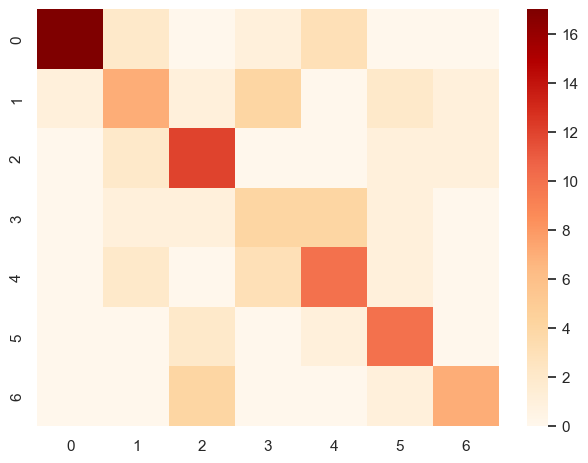

<Figure size 640x480 with 0 Axes>

In [14]:
sns.heatmap(cm,cmap="OrRd")
plt.tight_layout()
plt.show()

plt.savefig("results/confusion_matrix.png",dpi = 500)

In [15]:
from sklearn.metrics import classification_report

print(classification_report( y_test,clf_svc.predict(x_test)))

              precision    recall  f1-score   support

       anger       0.74      0.94      0.83        18
     anxiety       0.44      0.50      0.47        14
     boredom       0.75      0.60      0.67        20
     disgust       0.36      0.33      0.35        12
       happy       0.62      0.56      0.59        18
     neutral       0.77      0.62      0.69        16
     sadness       0.58      0.78      0.67         9

    accuracy                           0.63       107
   macro avg       0.61      0.62      0.61       107
weighted avg       0.63      0.63      0.62       107

